In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
pip install underthesea

     |████████████████████████████████| 7.6 MB 4.6 MB/s 
     |████████████████████████████████| 235 kB 55.7 MB/s 
     |████████████████████████████████| 581 kB 63.3 MB/s 
     |████████████████████████████████| 743 kB 67.3 MB/s 


----------------------
# ***Importing libraries***

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from underthesea import word_tokenize, pos_tag
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split
plt.style.use('fivethirtyeight')

---------------
# ***Handling dataset***
- 

### Function to word tokenize

In [ ]:
# Function to word tokenize
def function_word_tokenize(dataset, col_name):
  result = dataset[col_name].array

  for i in range(len(result)):
    result[i] = word_tokenize(str(result[i]), format='text')

  dataset[col_name] = result

### Tiki

In [ ]:
# Import dataset
data_tiki = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/review_tiki_after_preprocessing.csv') 
data_tiki.fillna('0',inplace=True)


### START: Word_Tokenize

# Create new column
data_tiki['word_tokenize'] = data_tiki['content_handle']

# Handling word tokenize
function_word_tokenize(data_tiki,'word_tokenize')

# TF-IDF
tfidf_vectorizer = TfidfVectorizer(min_df=5, max_df=0.8)
x = tfidf_vectorizer.fit_transform(data_tiki['word_tokenize'])

### END: Word_Tokenize


# # TF-IDF
# tfidf_vectorizer = TfidfVectorizer(min_df=5, max_df=0.8)
# x = tfidf_vectorizer.fit_transform(data_tiki['content_handle'])

# #tfidf_tiki = pd.DataFrame(x.toarray(), columns = tfidf_vectorizer.get_feature_names())

word = tfidf_vectorizer.get_feature_names_out()

# Algorithm -> Logistic Regression
y = data_tiki['sentiment']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state = 6)

from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(solver='liblinear')
model_lr  = log_reg.fit(X_train, y_train)

model_lr.score(X_test, y_test)

# Coefficient
coef = model_lr.coef_.tolist()[0]
coef_data = pd.DataFrame({'Word': word, 'Coefficient': coef})
coef_data = coef_data.sort_values(['Coefficient', 'Word'], ascending=False)

# Top 20 words positive
positive_words_tiki = coef_data.head(20)

# Top 20 words negative
negative_words_tiki = coef_data.tail(20)

In [ ]:
print(positive_words_tiki)
print('\n')
print(negative_words_tiki)

             Word  Coefficient
1212        nhanh     5.576127
1850    tuyệt_vời     3.870899
1927          tốt     3.249118
2306       ủng_hộ     3.190712
236    chất_lượng     3.001162
1848        tuyệt     2.991336
1213  nhanh_chóng     2.990963
735           hơi     2.855238
1173         ngon     2.814500
2101      yên_tâm     2.771245
2239          đẹp     2.768769
1955       uy_tín     2.754496
703      hài_lòng     2.662248
1476           rẻ     2.658143
1796     trái_tim     2.649771
640           hay     2.635053
2301           ổn     2.632043
2102          yêu     2.560771
7          an_tâm     2.556314
1472          rất     2.514008


            Word  Coefficient
244        chẳng    -2.662821
831          khó    -2.676773
1075          mà    -2.724045
238    chậm_chạp    -2.777542
1439          ra    -2.826546
231          chả    -2.847485
837    không_thể    -3.165039
1433   quảng_cáo    -3.166285
1853        tuần    -3.236044
1634       tháng    -3.405560
237         chậm 

In [ ]:
fig, axes = plt.subplots(nrows=1,ncols=2, figsize= (35,17))
#color = plt.cm.viridis(np.linspace(0, 1, 20))

positive_words_tiki.plot(x='Word', y='Coefficient', kind='barh', color= '#0C005A', ax= axes[0])
negative_words_tiki.plot(x='Word', y='Coefficient', kind='barh', color= '#FF0000', ax=axes[1])
#positive_words_sendo.plot(x='Word', y='Coefficient', kind='bar', color= color, ax= axes[0,1])
#positive_words_lazada.plot(x='Word', y='Coefficient', kind='bar', color= color, ax= axes[1,0])
#positive_words_shopee.plot(x='Word', y='Coefficient', kind='bar', color= color, ax= axes[1,1])

axes[0].set_title("\nMost Positive Words\n", fontweight = 600, fontsize = 28)
axes[1].set_title("\nMost Negative Words\n", fontweight = 600, fontsize = 28)
#axes[1,0].set_title("Most Positive Words Lazada", fontweight = 600, fontsize = 28)
#axes[1,1].set_title("Most Positive Words Shopee", fontweight = 600, fontsize = 28)

axes[0].set_yticklabels(axes[0].get_yticklabels(), rotation= 0, fontsize= 30)
axes[1].set_yticklabels(axes[1].get_yticklabels(), rotation= 0, fontsize= 30)
axes[0].set_xticklabels(("0","1","2","3","4","5"), fontsize= 25)
axes[1].set_xticklabels(("","-7","-6","-5","-4","-3","-2","-1",), fontsize= 25)
#axes[1,0].set_xticklabels(axes[1,0].get_xticklabels(), rotation= 60)
#axes[1,1].set_xticklabels(axes[1,1].get_xticklabels(), rotation= 60)

axes[0].set_ylabel('\nWords', fontsize = 30)
axes[1].set_ylabel('\nWords', fontsize = 30)
#axes[1,0].set_ylabel('Coefficient', fontsize = 22)
#axes[1,1].set_ylabel('Coefficient', fontsize = 22)

axes[0].set_xlabel('Coefficient', fontsize = 30)
axes[1].set_xlabel('Coefficient', fontsize = 30)
#axes[1,0].set_xlabel('Word', fontsize = 22)
#axes[1,1].set_xlabel('Word', fontsize = 22)

plt.suptitle("\nTOP WORDS", y = 0.95, fontweight = "bold", fontsize = 36)

### MAKE LABELS
rects = axes[0].patches
labels = positive_words_tiki['Coefficient'].tolist()
for i in range(len(labels)):
  labels[i]=round(labels[i],2)
for rect, label in zip(rects, labels):
    height = rect.get_width()
    axes[0].text(
        height + 0.19, rect.get_y() + rect.get_height() / 3,label, ha="center", va="bottom", fontsize=25
    )

rects = axes[1].patches  
labels = negative_words_tiki['Coefficient'].tolist()
for i in range(len(labels)):
  labels[i]=round(labels[i],2)
for rect, label in zip(rects, labels):
    height = rect.get_width()
    axes[1].text(
        height - 0.2, rect.get_y() + rect.get_height() / 3, label, ha="center", va="bottom", fontsize=25
    )



plt.savefig('Top Words.png', bbox_inches= "tight")
plt.show()

### Sendo

In [ ]:
# Import dataset
data_sendo = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/review_sendo_after_preprocessing.csv')
data_sendo.fillna('0',inplace=True)


### START: Word_Tokenize

# Create new column
data_sendo['word_tokenize'] = data_sendo['content_handle']

# Handling word tokenize
function_word_tokenize(data_sendo,'word_tokenize')

# TF-IDF
tfidf_vectorizer = TfidfVectorizer(min_df=5, max_df=0.8)
x = tfidf_vectorizer.fit_transform(data_sendo['word_tokenize'])

### END: Word_Tokenize


# # TF-IDF
# tfidf_vectorizer = TfidfVectorizer(min_df=5, max_df=0.8)
# x = tfidf_vectorizer.fit_transform(data_sendo['content_handle'])
# #tfidf_sendo = pd.DataFrame(x.toarray(), columns = tfidf_vectorizer.get_feature_names())

word = tfidf_vectorizer.get_feature_names_out()

# Algorithm -> Logistic Regression
y = data_sendo['sentiment']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state = 6)

from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(solver='liblinear')
model_lr  = log_reg.fit(X_train, y_train)

model_lr.score(X_test, y_test)

# Coefficient
coef = model_lr.coef_.tolist()[0]
coef_data = pd.DataFrame({'Word': word, 'Coefficient': coef})
coef_data = coef_data.sort_values(['Coefficient', 'Word'], ascending=False)

# Top 20 words positive
positive_words_sendo = coef_data.head(20)

# Top 20 words negative
negative_words_sendo = coef_data.tail(20)

In [ ]:
print(positive_words_sendo)
print('\n')
print(negative_words_sendo)

             Word  Coefficient
1522        nhanh     3.703024
2351    tuyệt_vời     3.310644
2909       ủng_hộ     3.086974
1484         ngon     2.554794
1856          rất     2.547302
1575        nhưng     2.475163
2443          tốt     2.333419
1523  nhanh_chóng     2.302449
598       dễ_dàng     2.296005
2225     tiện_lợi     2.254071
902           hơi     2.224853
923       hấp_dẫn     2.218953
253         chuẩn     2.217297
2484       uy_tín     2.212345
789           hay     2.190568
1335     mong_đợi     2.140837
240         chuan     2.113330
2290     trái_tim     2.048950
1862           rẻ     2.045739
52           biết     2.035823


            Word  Coefficient
1003       khong    -2.928662
2451         tồi    -2.938328
2637         xàm    -2.981148
1024         khó    -3.014972
1804   quảng_cáo    -3.060520
423          cùi    -3.105806
1276         lừa    -3.106110
2245        toàn    -3.126237
869   hàng_không    -3.231157
309         chậm    -3.253466
2068    thiên_vị 

### Shopee

In [ ]:
# Import dataset
data_shopee = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/review_shopee_after_preprocessing.csv')
data_shopee.fillna('0',inplace=True)


### START: Word_Tokenize

# Create new column
data_shopee['word_tokenize'] = data_shopee['content_handle']

# Handling word tokenize
function_word_tokenize(data_shopee,'word_tokenize')

# TF-IDF
tfidf_vectorizer = TfidfVectorizer(min_df=5, max_df=0.8)
x = tfidf_vectorizer.fit_transform(data_shopee['word_tokenize'])

### END: Word_Tokenize


# # TF-IDF
# tfidf_vectorizer = TfidfVectorizer(min_df=5, max_df=0.8)
# x = tfidf_vectorizer.fit_transform(data_shopee['content_handle'])
# #tfidf_shopee = pd.DataFrame(x.toarray(), columns = tfidf_vectorizer.get_feature_names())

word = tfidf_vectorizer.get_feature_names_out()

# Algorithm -> Logistic Regression
y = data_shopee['sentiment']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state = 6)

from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(solver='liblinear')
model_lr  = log_reg.fit(X_train, y_train)

model_lr.score(X_test, y_test)

# Coefficient
coef = model_lr.coef_.tolist()[0]
coef_data = pd.DataFrame({'Word': word, 'Coefficient': coef})
coef_data = coef_data.sort_values(['Coefficient', 'Word'], ascending=False)

# Top 20 words positive
positive_words_shopee = coef_data.head(20)

# Top 20 words negative
negative_words_shopee = coef_data.tail(20)

In [ ]:
print(positive_words_shopee)
print('\n')
print(negative_words_shopee)

             Word  Coefficient
4773    tuyệt_vời     4.806783
3062        nhanh     4.783071
2935       nghiện     4.769469
1779          hơi     4.273388
4769        tuyệt     4.249019
4523     tiện_lợi     4.057523
4525     tiện_ích     3.626084
4624     trái_tim     3.558864
4967          tốt     3.523089
5832         đỉnh     3.517035
1190           dễ     3.508621
4521         tiện     3.454322
5990       ủng_hộ     3.444009
2962         ngon     3.440434
3063  nhanh_chóng     3.392556
4522    tiện_dụng     3.224718
4755    tuy_nhiên     3.189630
1905      hữu_ích     3.163704
1192      dễ_dàng     3.146505
5061       uy_tín     3.043157


           Word  Coefficient
2044  không_thể    -3.651410
2031       khóa    -3.719534
793         cáo    -3.755114
2517        lỗi    -3.766259
615        chậm    -3.782568
380    bực_mình    -3.786637
633       chẳng    -3.815856
3200  nhếch_mép    -3.990004
4983     tồi_tệ    -3.990105
3441      phiền    -4.271953
519        chán    -4.297526

### Lazada

In [ ]:
# Import dataset
data_lazada = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/review_lazada_after_preprocessing.csv')
data_lazada.fillna('0',inplace=True)


### START: Word_Tokenize

# Create new column
data_lazada['word_tokenize'] = data_lazada['content_handle']

# Handling word tokenize
function_word_tokenize(data_lazada,'word_tokenize')

# TF-IDF
tfidf_vectorizer = TfidfVectorizer(min_df=5, max_df=0.8)
x = tfidf_vectorizer.fit_transform(data_lazada['word_tokenize'])

### END: Word_Tokenize


# # TF-IDF
# tfidf_vectorizer = TfidfVectorizer(min_df=5, max_df=0.8)
# x = tfidf_vectorizer.fit_transform(data_lazada['content_handle'])
# #tfidf_lazada = pd.DataFrame(x.toarray(), columns = tfidf_vectorizer.get_feature_names())

word = tfidf_vectorizer.get_feature_names_out()

# Algorithm -> Logistic Regression
y = data_lazada['sentiment']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state = 6)

from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(solver='liblinear')
model_lr  = log_reg.fit(X_train, y_train)

model_lr.score(X_test, y_test)

# Coefficient
coef = model_lr.coef_.tolist()[0]
coef_data = pd.DataFrame({'Word': word, 'Coefficient': coef})
coef_data = coef_data.sort_values(['Coefficient', 'Word'], ascending=False)

# Top 20 words positive
positive_words_lazada = coef_data.head(20)

# Top 20 words negative
negative_words_lazada = coef_data.tail(20)

In [ ]:
print(positive_words_lazada)
print('\n')
print(negative_words_lazada)

           Word  Coefficient
2346      nhanh     4.259679
3603  tuyệt_vời     3.511246
1391        hơi     3.231344
911          dễ     3.227196
3422   tiện_ích     3.029707
3599      tuyệt     3.016551
2888         rẻ     2.988636
3752        tốt     2.930783
3420   tiện_lợi     2.900172
3507   trái_tim     2.897496
2278       ngon     2.830193
913     dễ_dàng     2.749092
2424      nhưng     2.625455
2891         rẽ     2.606861
4041   xuất_sắc     2.521836
1868         ló     2.504546
1334    hy_vọng     2.472760
1231        hay     2.460676
386       chuẩn     2.457303
1476    hữu_ích     2.423270


            Word  Coefficient
2267     nghệ_sĩ    -3.793920
1579    khó_chịu    -3.822859
2623  phiền_phức    -4.026971
3966      vớ_vẩn    -4.092873
4329    đại_diện    -4.103284
3733      tệ_hại    -4.107621
3769      tồi_tệ    -4.116914
394         chán    -4.118641
3005        spam    -4.168327
1586       không    -4.221330
273          bực    -4.257915
1028        ghét    -4.323132

# ***Test***

### Tiki

In [ ]:
# Import dataset
data_tiki = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/Research Science/Dataset/review_tiki_after_preprocessing.csv')
data_tiki.fillna('0',inplace=True)

# TF-IDF
tfidf_vectorizer = TfidfVectorizer(min_df=5, max_df=0.8)
x = tfidf_vectorizer.fit_transform(data_tiki['content_handle'])
#tfidf_tiki = pd.DataFrame(x.toarray(), columns = tfidf_vectorizer.get_feature_names())

word = tfidf_vectorizer.get_feature_names_out()

# Algorithm -> Logistic Regression
y = data_tiki['sentiment']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state = 6)

from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(solver='liblinear')
model_lr  = log_reg.fit(X_train, y_train)

model_lr.score(X_test, y_test)

# Coefficient
coef = model_lr.coef_.tolist()[0]
coef_data = pd.DataFrame({'Word': word, 'Coefficient': coef})
coef_data = coef_data.sort_values(['Coefficient', 'Word'], ascending=False)

# Top 20 words positive
positive_words_tiki = coef_data.head(20)

# Top 20 words negative
negative_words_tiki = coef_data.tail(20)

### Sendo

In [ ]:
# Import dataset
data_sendo = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/Research Science/Dataset/review_sendo_after_preprocessing.csv')
data_sendo.fillna('0',inplace=True)

# TF-IDF
tfidf_vectorizer = TfidfVectorizer(min_df=5, max_df=0.8)
x = tfidf_vectorizer.fit_transform(data_sendo['content_handle'])
#tfidf_sendo = pd.DataFrame(x.toarray(), columns = tfidf_vectorizer.get_feature_names())

word = tfidf_vectorizer.get_feature_names_out()

# Algorithm -> Logistic Regression
y = data_sendo['sentiment']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state = 6)

from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(solver='liblinear')
model_lr  = log_reg.fit(X_train, y_train)

model_lr.score(X_test, y_test)

# Coefficient
coef = model_lr.coef_.tolist()[0]
coef_data = pd.DataFrame({'Word': word, 'Coefficient': coef})
coef_data = coef_data.sort_values(['Coefficient', 'Word'], ascending=False)

# Top 20 words positive
positive_words_sendo = coef_data.head(20)

# Top 20 words negative
negative_words_sendo = coef_data.tail(20)

### Shopee

In [ ]:
# Import dataset
data_shopee = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/Research Science/Dataset/review_shopee_after_preprocessing.csv')
data_shopee.fillna('0',inplace=True)

# TF-IDF
tfidf_vectorizer = TfidfVectorizer(min_df=5, max_df=0.8)
x = tfidf_vectorizer.fit_transform(data_shopee['content_handle'])
#tfidf_shopee = pd.DataFrame(x.toarray(), columns = tfidf_vectorizer.get_feature_names())

word = tfidf_vectorizer.get_feature_names_out()

# Algorithm -> Logistic Regression
y = data_shopee['sentiment']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state = 6)

from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(solver='liblinear')
model_lr  = log_reg.fit(X_train, y_train)

model_lr.score(X_test, y_test)

# Coefficient
coef = model_lr.coef_.tolist()[0]
coef_data = pd.DataFrame({'Word': word, 'Coefficient': coef})
coef_data = coef_data.sort_values(['Coefficient', 'Word'], ascending=False)

# Top 20 words positive
positive_words_shopee = coef_data.head(20)

# Top 20 words negative
negative_words_shopee = coef_data.tail(20)

### Lazada

In [ ]:
# Import dataset
data_lazada = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/Research Science/Dataset/review_lazada_after_preprocessing.csv')
data_lazada.fillna('0',inplace=True)

# TF-IDF
tfidf_vectorizer = TfidfVectorizer(min_df=5, max_df=0.8)
x = tfidf_vectorizer.fit_transform(data_lazada['content_handle'])
#tfidf_lazada = pd.DataFrame(x.toarray(), columns = tfidf_vectorizer.get_feature_names())

word = tfidf_vectorizer.get_feature_names_out()

# Algorithm -> Logistic Regression
y = data_lazada['sentiment']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state = 6)

from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(solver='liblinear')
model_lr  = log_reg.fit(X_train, y_train)

model_lr.score(X_test, y_test)

# Coefficient
coef = model_lr.coef_.tolist()[0]
coef_data = pd.DataFrame({'Word': word, 'Coefficient': coef})
coef_data = coef_data.sort_values(['Coefficient', 'Word'], ascending=False)

# Top 20 words positive
positive_words_lazada = coef_data.head(20)

# Top 20 words negative
negative_words_lazada = coef_data.tail(20)

---------------
# ***Visualize***
- 

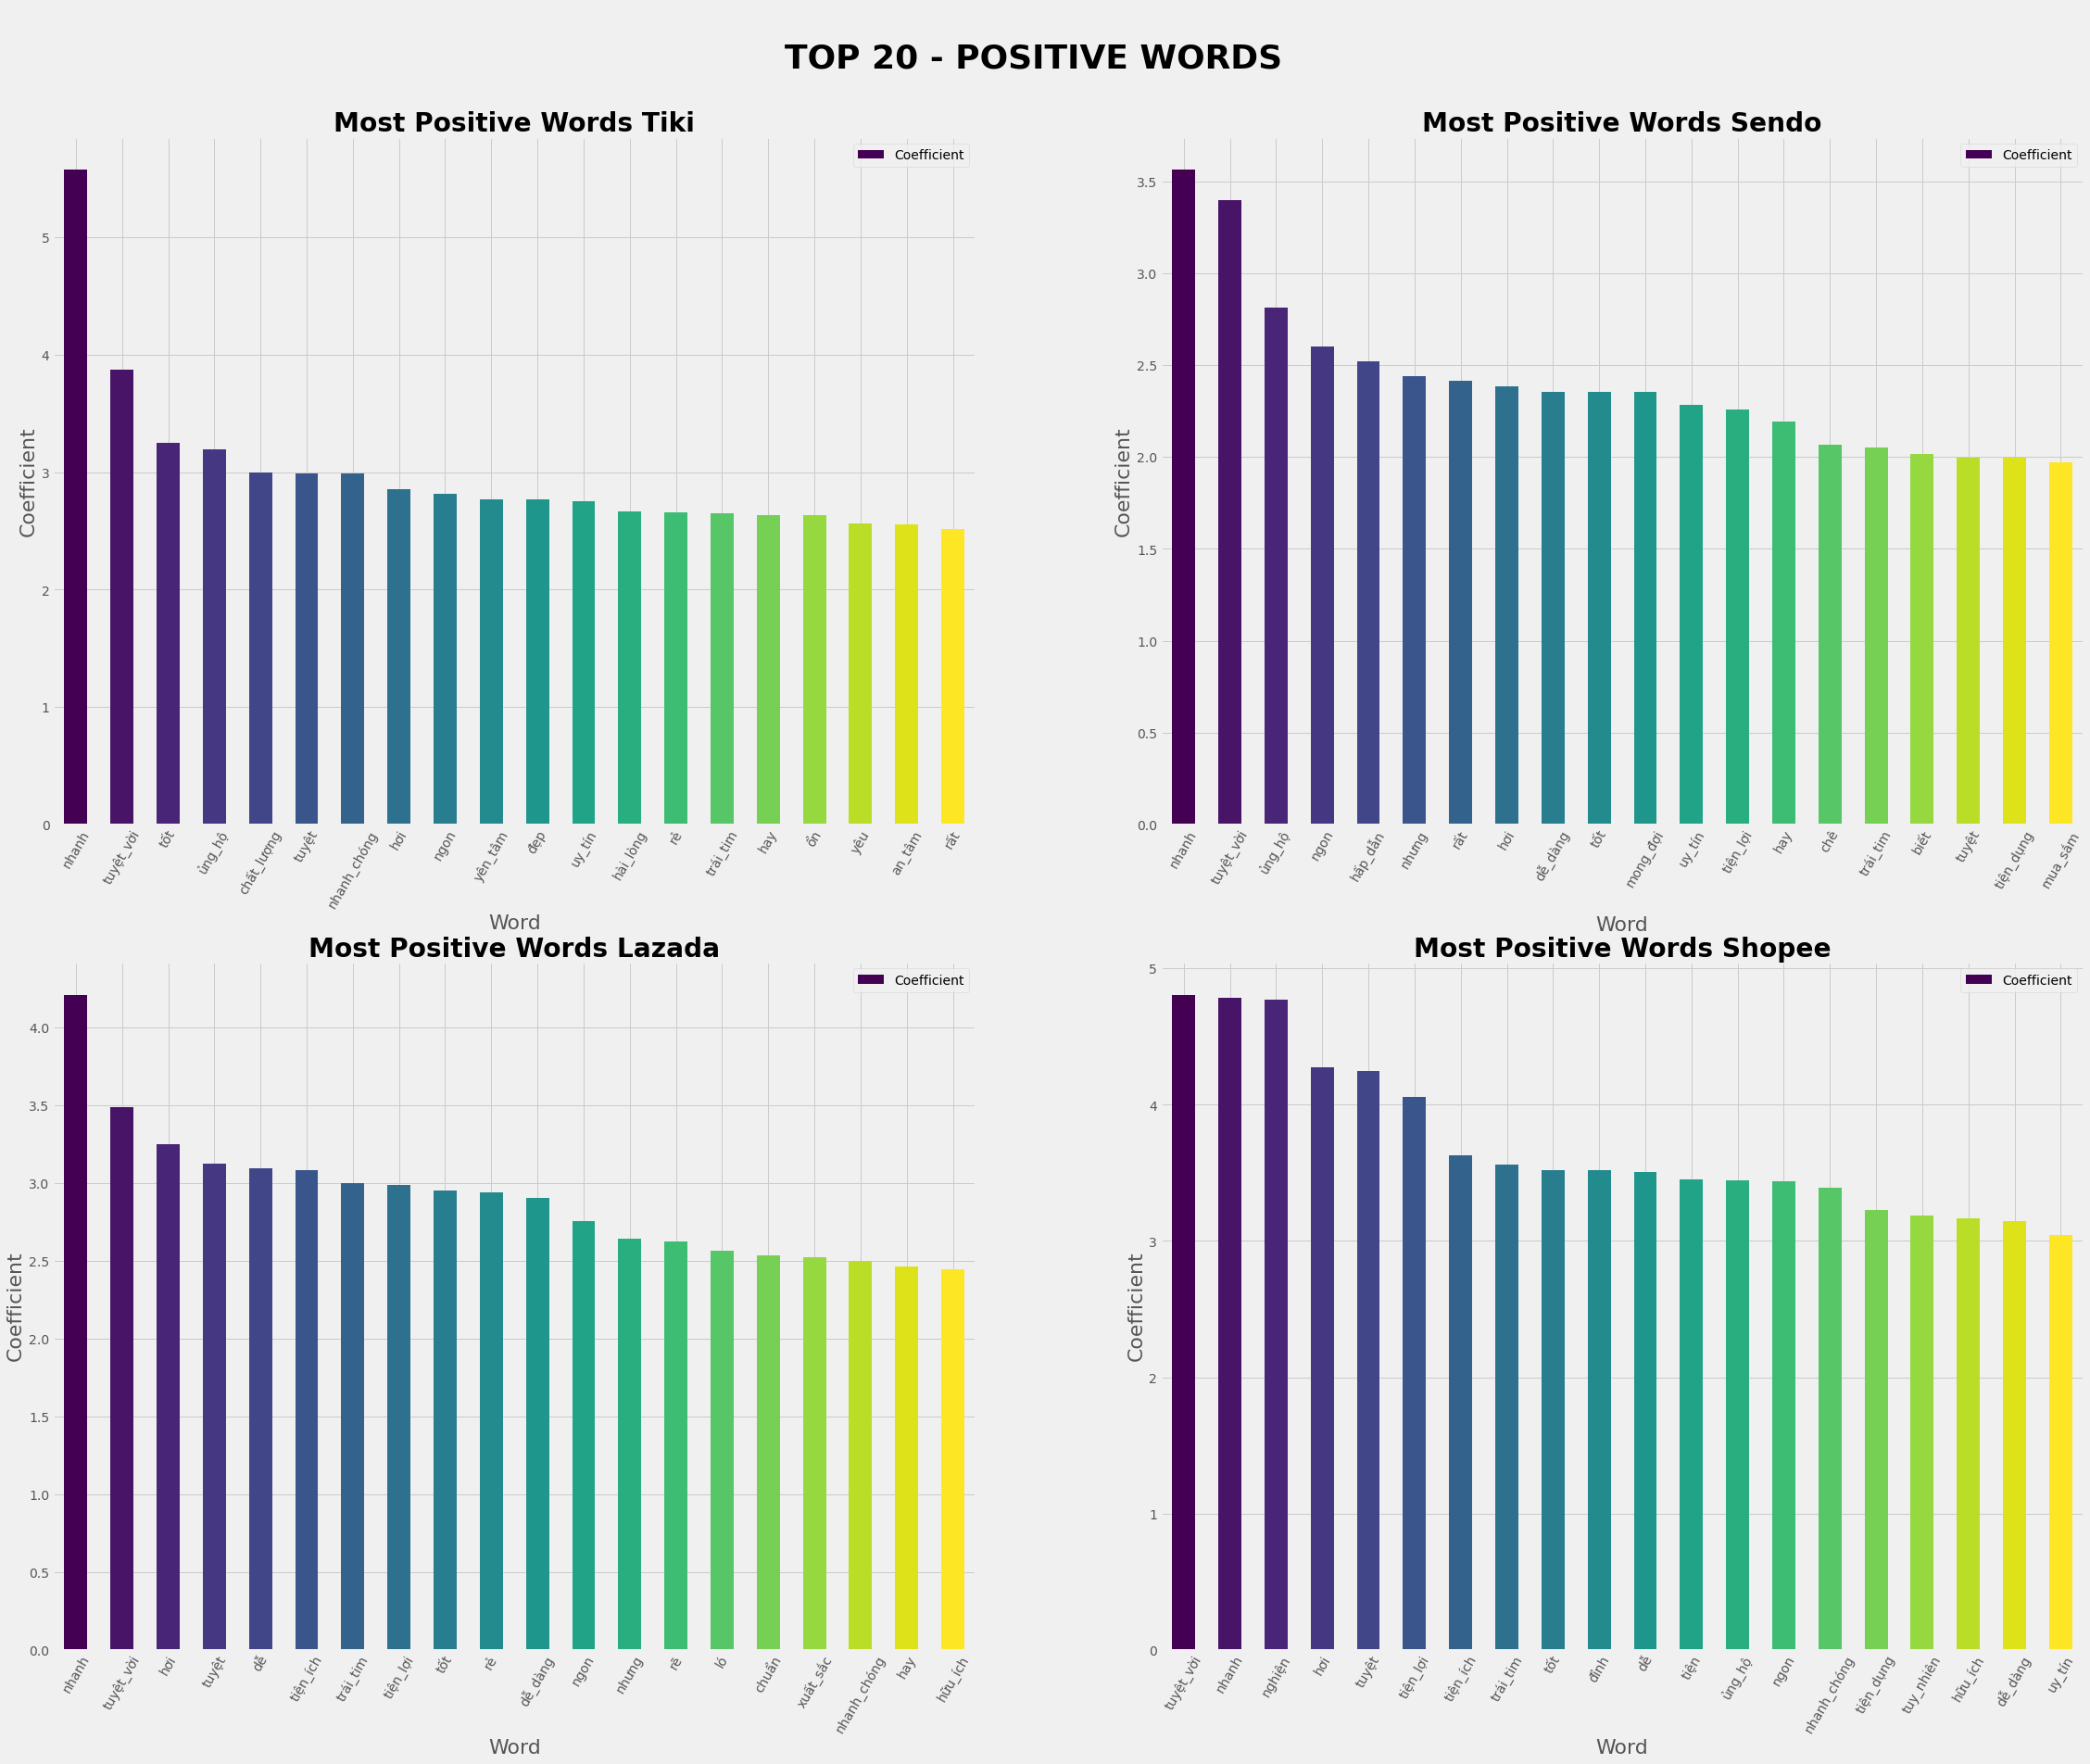

In [ ]:
fig, axes = plt.subplots(nrows=2,ncols=2, figsize= (35,28))
color = plt.cm.viridis(np.linspace(0, 1, 20))

positive_words_tiki.plot(x='Word', y='Coefficient', kind='bar', color= color, ax= axes[0,0])
positive_words_sendo.plot(x='Word', y='Coefficient', kind='bar', color= color, ax= axes[0,1])
positive_words_lazada.plot(x='Word', y='Coefficient', kind='bar', color= color, ax= axes[1,0])
positive_words_shopee.plot(x='Word', y='Coefficient', kind='bar', color= color, ax= axes[1,1])

axes[0,0].set_title("Most Positive Words Tiki", fontweight = 600, fontsize = 28)
axes[0,1].set_title("Most Positive Words Sendo", fontweight = 600, fontsize = 28)
axes[1,0].set_title("Most Positive Words Lazada", fontweight = 600, fontsize = 28)
axes[1,1].set_title("Most Positive Words Shopee", fontweight = 600, fontsize = 28)

axes[0,0].set_xticklabels(axes[0,0].get_xticklabels(), rotation= 60)
axes[0,1].set_xticklabels(axes[0,1].get_xticklabels(), rotation= 60)
axes[1,0].set_xticklabels(axes[1,0].get_xticklabels(), rotation= 60)
axes[1,1].set_xticklabels(axes[1,1].get_xticklabels(), rotation= 60)

axes[0,0].set_ylabel('Coefficient', fontsize = 22)
axes[0,1].set_ylabel('Coefficient', fontsize = 22)
axes[1,0].set_ylabel('Coefficient', fontsize = 22)
axes[1,1].set_ylabel('Coefficient', fontsize = 22)

axes[0,0].set_xlabel('Word', fontsize = 22)
axes[0,1].set_xlabel('\nWord', fontsize = 22)
axes[1,0].set_xlabel('Word', fontsize = 22)
axes[1,1].set_xlabel('Word', fontsize = 22)

plt.suptitle("\nTOP 20 - POSITIVE WORDS", y = 0.95, fontweight = "bold", fontsize = 36)

#plt.savefig('Positive_Words_Top20.png', bbox_inches= "tight")
plt.show()

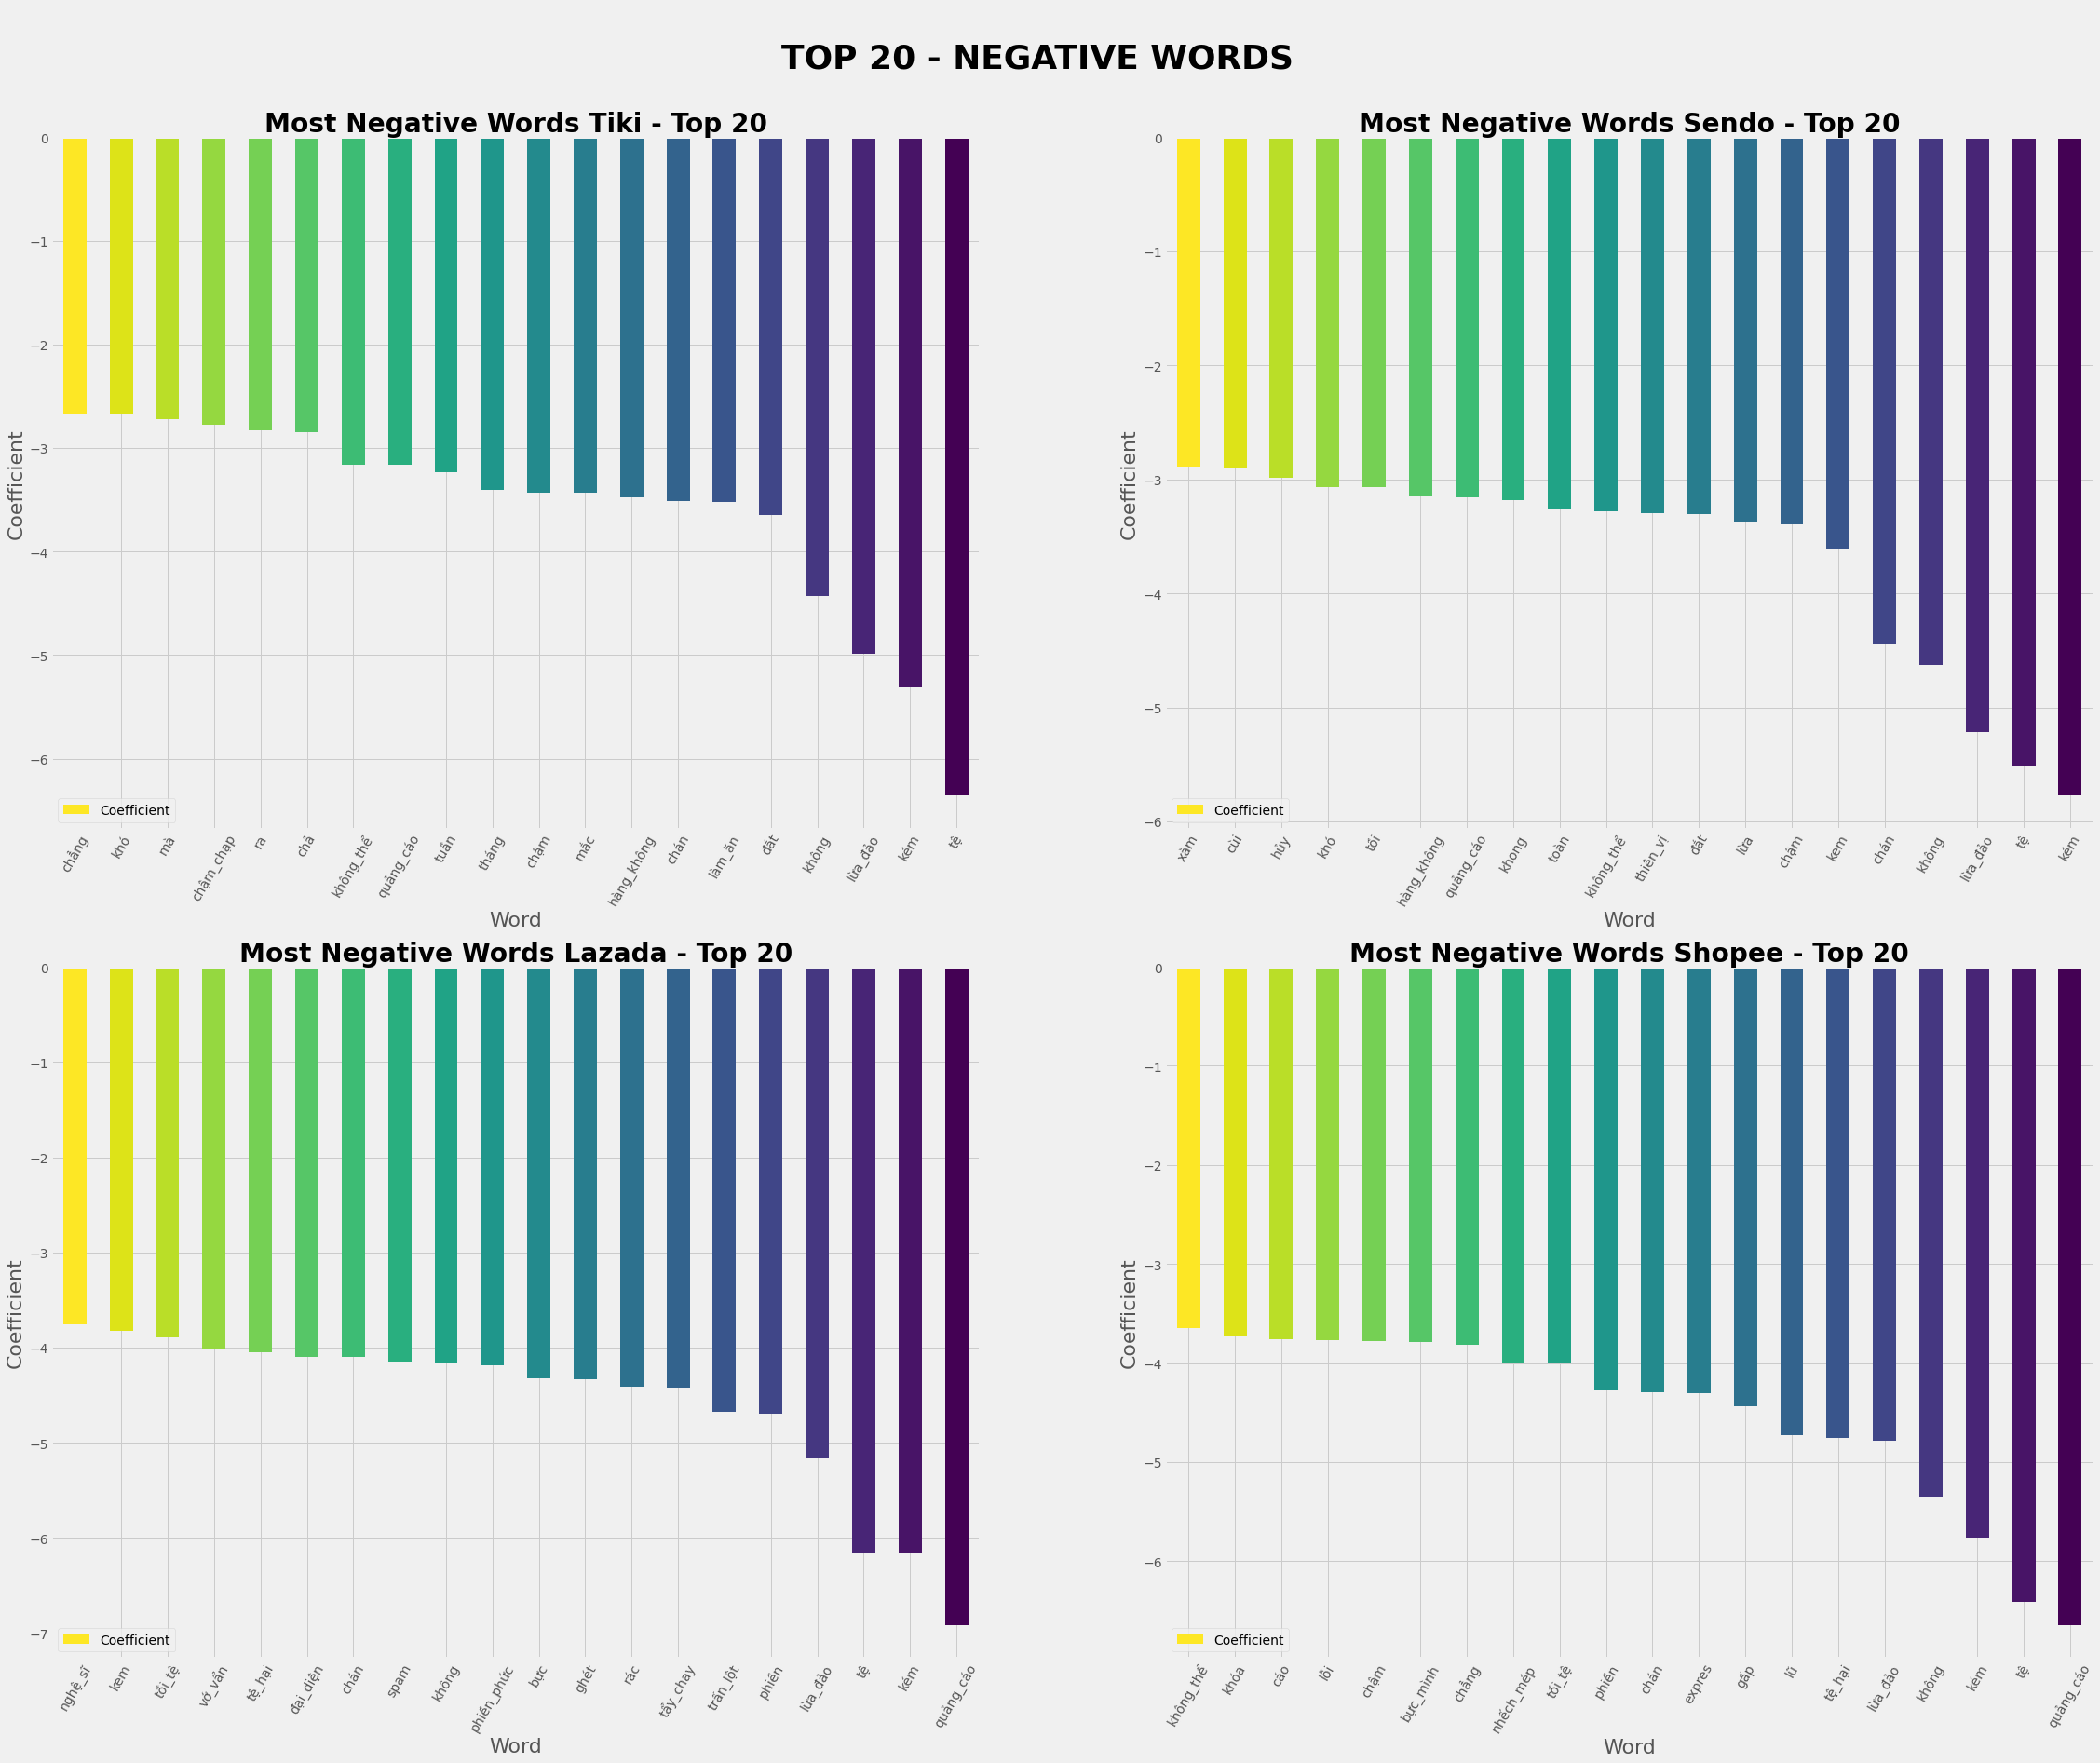

In [ ]:
fig, axes = plt.subplots(nrows=2,ncols=2, figsize= (35,28))
color = plt.cm.viridis(np.linspace(1, 0, 20))

negative_words_tiki.plot(x='Word', y='Coefficient', kind='bar', color= color, ax=axes[0,0])
negative_words_sendo.plot(x='Word', y='Coefficient', kind='bar', color= color, ax=axes[0,1])
negative_words_lazada.plot(x='Word', y='Coefficient', kind='bar', color= color, ax=axes[1,0])
negative_words_shopee.plot(x='Word', y='Coefficient', kind='bar', color= color, ax=axes[1,1])

axes[0,0].set_title("Most Negative Words Tiki - Top 20", fontweight = 600, fontsize = 28)
axes[0,1].set_title("Most Negative Words Sendo - Top 20", fontweight = 600, fontsize = 28)
axes[1,0].set_title("Most Negative Words Lazada - Top 20", fontweight = 600, fontsize = 28)
axes[1,1].set_title("Most Negative Words Shopee - Top 20", fontweight = 600, fontsize = 28)

axes[0,0].set_xticklabels(axes[0,0].get_xticklabels(), rotation= 60)
axes[0,1].set_xticklabels(axes[0,1].get_xticklabels(), rotation= 60)
axes[1,0].set_xticklabels(axes[1,0].get_xticklabels(), rotation= 60)
axes[1,1].set_xticklabels(axes[1,1].get_xticklabels(), rotation= 60)

axes[0,0].set_ylabel('Coefficient', fontsize = 22)
axes[0,1].set_ylabel('Coefficient', fontsize = 22)
axes[1,0].set_ylabel('Coefficient', fontsize = 22)
axes[1,1].set_ylabel('Coefficient', fontsize = 22)

axes[0,0].set_xlabel('Word', fontsize = 22)
axes[0,1].set_xlabel('Word', fontsize = 22)
axes[1,0].set_xlabel('Word', fontsize = 22)
axes[1,1].set_xlabel('Word', fontsize = 22)

plt.suptitle("\nTOP 20 - NEGATIVE WORDS", y = 0.95, fontweight = "bold", fontsize = 36)

# plt.savefig('Negative_Words_Top20.png', bbox_inches= "tight")
plt.show()

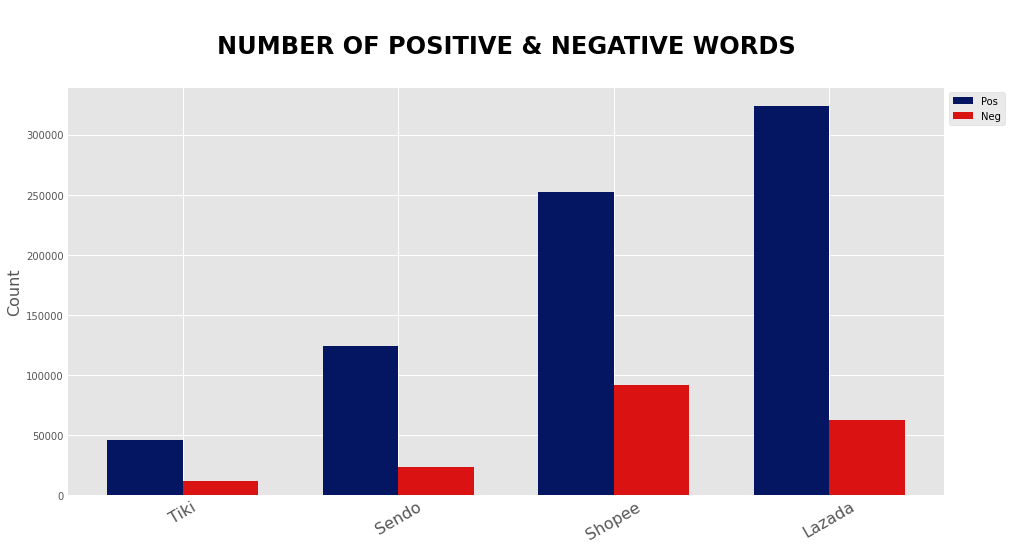

In [ ]:
plt.style.use('ggplot')
fig, axes = plt.subplots(figsize= (14,7))

pos_count = [data_tiki.sentiment.value_counts()[0], 
             data_sendo.sentiment.value_counts()[0], 
             data_shopee.sentiment.value_counts()[0], 
             data_lazada.sentiment.value_counts()[0]]

neg_count = [data_tiki.sentiment.value_counts()[1], 
             data_sendo.sentiment.value_counts()[1], 
             data_shopee.sentiment.value_counts()[1], 
             data_lazada.sentiment.value_counts()[1]]   

ind = np.arange(4) 
width = 0.35 
pos_bar = plt.bar(ind, pos_count, width, label='Pos', color = '#041562')
neg_bar = plt.bar(ind + width, neg_count, width, label='Neg', color = '#DA1212')

xlabel = ['Tiki', 'Sendo', 'Shopee', 'Lazada']
plt.title('\nNUMBER OF POSITIVE & NEGATIVE WORDS\n', fontweight = "bold", fontsize = 24)
plt.xticks(ind + width / 2, xlabel)
plt.ylabel('Count', fontsize = 16)
axes.set_xticklabels(xlabel, fontsize = 16, rotation = 30)
plt.legend(loc='upper left', bbox_to_anchor=(1,1), ncol=1)

# for bar in pos_bar:
#     plt.annotate(bar.get_height(), 
#                  xy=(bar.get_x()+0.07, bar.get_height()+10), 
#                      fontsize=12)

# for bar in neg_bar:
#     plt.annotate(bar.get_height(), 
#                  xy=(bar.get_x()+0.07, bar.get_height()+10), 
#                      fontsize=12)

#plt.savefig('Number_of_Pos&Neg_Words.png', bbox_inches= "tight")
plt.show()

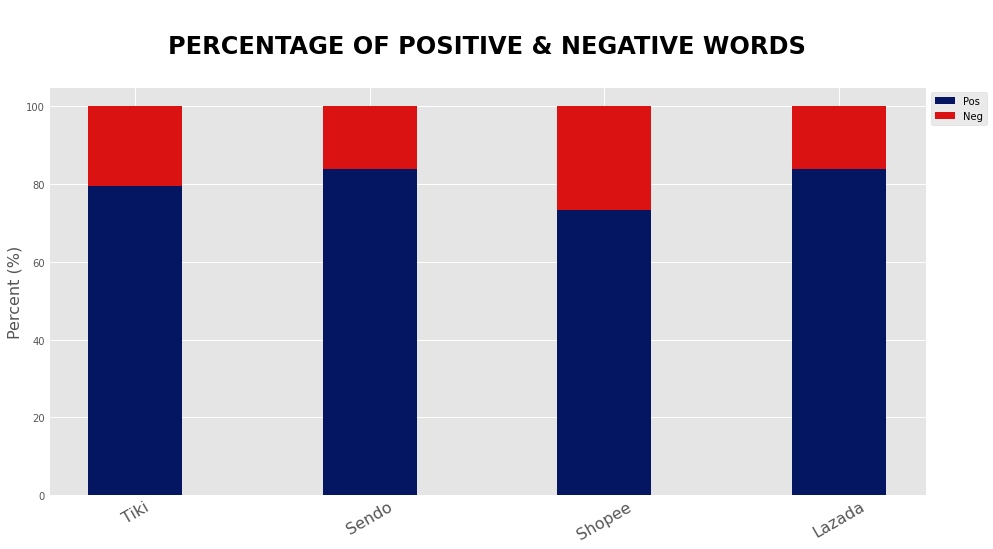

In [ ]:
plt.style.use('ggplot')
fig, axes = plt.subplots(figsize= (14,7))   

pos_count = [data_tiki.sentiment.value_counts()[0] / (data_tiki.sentiment.value_counts()[0] +data_tiki.sentiment.value_counts()[1]) * 100,
       data_sendo.sentiment.value_counts()[0] / (data_sendo.sentiment.value_counts()[0] +data_sendo.sentiment.value_counts()[1]) * 100,
       data_shopee.sentiment.value_counts()[0] / (data_shopee.sentiment.value_counts()[0] +data_shopee.sentiment.value_counts()[1]) * 100,
       data_lazada.sentiment.value_counts()[0] / (data_lazada.sentiment.value_counts()[0] +data_lazada.sentiment.value_counts()[1]) * 100]

neg_count = [data_tiki.sentiment.value_counts()[1] / (data_tiki.sentiment.value_counts()[0] +data_tiki.sentiment.value_counts()[1]) * 100,
       data_sendo.sentiment.value_counts()[1] / (data_sendo.sentiment.value_counts()[0] +data_sendo.sentiment.value_counts()[1]) * 100,
       data_shopee.sentiment.value_counts()[1] / (data_shopee.sentiment.value_counts()[0] +data_shopee.sentiment.value_counts()[1]) * 100,
       data_lazada.sentiment.value_counts()[1] / (data_lazada.sentiment.value_counts()[0] +data_lazada.sentiment.value_counts()[1]) * 100]

width = 0.4
xlabel = ['Tiki', 'Sendo', 'Shopee', 'Lazada']
plt.bar(x = xlabel, height = pos_count, label = 'Pos', color = '#041562', width=width)
plt.bar(x = xlabel, height = neg_count, bottom = pos_count, label = "Neg", color = '#DA1212', width=width)

plt.title('\nPERCENTAGE OF POSITIVE & NEGATIVE WORDS\n', fontsize=24, fontweight = "bold")
plt.ylabel('Percent (%)', fontsize = 16)
axes.set_xticklabels(xlabel, fontsize = 16, rotation = 30)
plt.legend(loc='upper left', bbox_to_anchor=(1,1), ncol=1)

# for n, x in enumerate([*cross_tab.index.values]):
#     for (proportion, y_loc) in zip(cross_tab_prop.loc[x],
#                                    cross_tab_prop.loc[x].cumsum()):
                
#         plt.text(x=n - 0.17,
#                  y=(y_loc - proportion) + (proportion / 2),
#                  s=f'{np.round(proportion * 100, 1)}%', 
#                  color="black",
#                  fontsize=12,
#                  fontweight="bold")
        
#plt.savefig('Percentage_of_Pos&Neg_Words.png', bbox_inches= "tight")
plt.show()

In [ ]:
cross_tab_prop.plot(kind='bar', 
                        stacked=True, 
                        colormap='tab10', 
                        figsize=(10, 6))

plt.legend(loc="lower left", ncol=2)
plt.xlabel("Release Year")
plt.ylabel("Proportion")


for n, x in enumerate([*cross_tab.index.values]):
    for (proportion, y_loc) in zip(cross_tab_prop.loc[x],
                                   cross_tab_prop.loc[x].cumsum()):
                
        plt.text(x=n - 0.17,
                 y=(y_loc - proportion) + (proportion / 2),
                 s=f'{np.round(proportion * 100, 1)}%', 
                 color="black",
                 fontsize=12,
                 fontweight="bold")

plt.show()

In [ ]:
### Length_content_handle

# Tiki
data_tiki['content_length'] = data_tiki['content_handle'].str.split().apply(len)
#data_tiki.groupby('content_length')

# Sendo
data_sendo['content_length'] = data_sendo['content_handle'].str.split().apply(len)
#data_sendo.groupby('content_length')

# Shopee
data_shopee['content_length'] = data_shopee['content_handle'].str.split().apply(len)
#data_shopee.groupby('content_length')

# Lazada
data_lazada['content_length'] = data_lazada['content_handle'].str.split().apply(len)
#data_lazada.groupby('content_length')

In [ ]:
### Lower

# Tiki
data_tiki['content_handle'] = data_tiki['content_handle'].str.lower()
data_tiki['word_tokenize'] = data_tiki['word_tokenize'].str.lower()

# Sendo
data_sendo['content_handle'] = data_sendo['content_handle'].str.lower()
data_sendo['word_tokenize'] = data_sendo['word_tokenize'].str.lower()

# Shopee
data_shopee['content_handle'] = data_shopee['content_handle'].str.lower()
data_shopee['word_tokenize'] = data_shopee['word_tokenize'].str.lower()

# Lazada
data_lazada['content_handle'] = data_lazada['content_handle'].str.lower()
data_lazada['word_tokenize'] = data_lazada['word_tokenize'].str.lower()

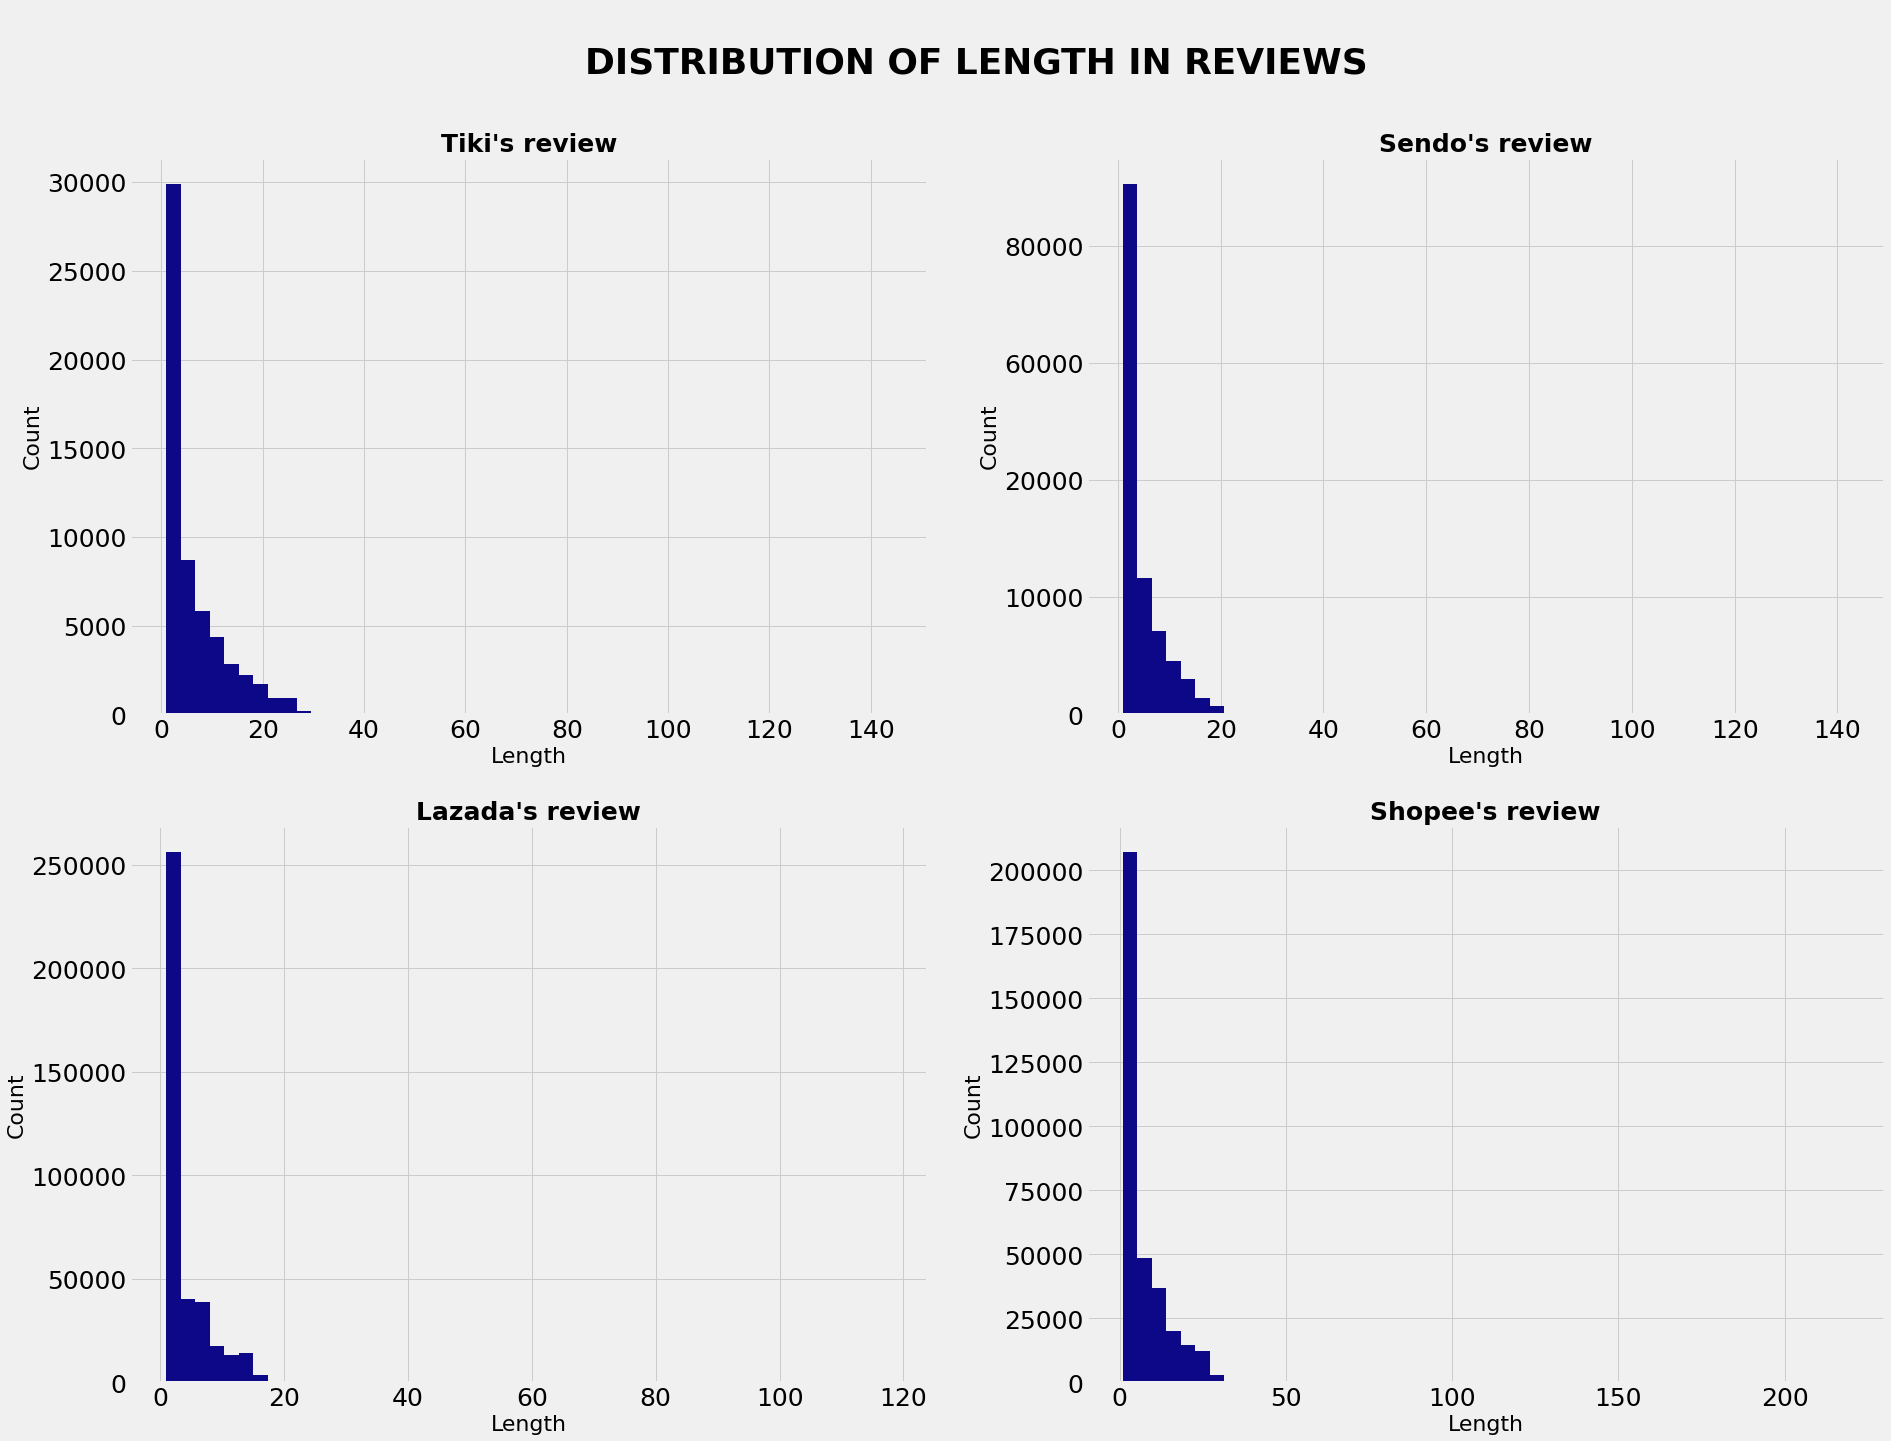

In [ ]:
#Length and Count
fig, axes = plt.subplots(nrows=2,ncols=2, figsize= (28,21))
color = plt.cm.plasma(np.linspace(0, 10, 10))

data_tiki['content_length'].plot(kind='hist', color= color, bins= 50, ax=axes[0,0])
data_sendo['content_length'].plot(kind='hist', color= color, bins= 50, ax=axes[0,1])
data_lazada['content_length'].plot(kind='hist', color= color, bins= 50, ax=axes[1,0])
data_shopee['content_length'].plot(kind='hist', color= color, bins= 50, ax=axes[1,1])

axes[0,0].set_title("Tiki's review", fontweight = 600, fontsize = 25)
axes[0,1].set_title("Sendo's review", fontweight = 600, fontsize = 25)
axes[1,0].set_title("Lazada's review", fontweight = 600, fontsize = 25)
axes[1,1].set_title("Shopee's review", fontweight = 600, fontsize = 25)

axes[0,0].set_xlabel('Length', fontsize = 22)
axes[0,1].set_xlabel('Length', fontsize = 22)
axes[1,0].set_xlabel('Length', fontsize = 22)
axes[1,1].set_xlabel('Length', fontsize = 22)

axes[0,0].set_ylabel('Count', fontsize = 22)
axes[0,1].set_ylabel('Count', fontsize = 22)
axes[1,0].set_ylabel('Count', fontsize = 22)
axes[1,1].set_ylabel('Count', fontsize = 22)

axes[0,0].set_xticklabels(("0","0","20","40","60","80","100","120","140"), fontsize= 25)
axes[0,1].set_xticklabels(("0","0","20","40","60","80","100","120","140"), fontsize= 25)
axes[1,0].set_xticklabels(("0","0","20","40","60","80","100","120"), fontsize= 25)
axes[1,1].set_xticklabels(("0","0","50","100","150","200"), fontsize= 25)
axes[0,0].set_yticklabels(("0","5000","10000","15000","20000","25000","30000"), fontsize= 25)
axes[0,1].set_yticklabels(("0","10000","20000","60000","80000"), fontsize= 25)
axes[1,0].set_yticklabels(("0","50000","100000","150000","200000","250000"), fontsize= 25)
axes[1,1].set_yticklabels(("0","25000","50000","75000","100000","125000","150000","175000","200000"), fontsize= 25)

plt.suptitle("\nDISTRIBUTION OF LENGTH IN REVIEWS", fontweight = "bold", fontsize = 36)

plt.savefig('Distribution_of_Length_in_Reviews.png', bbox_inches= "tight")
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-package

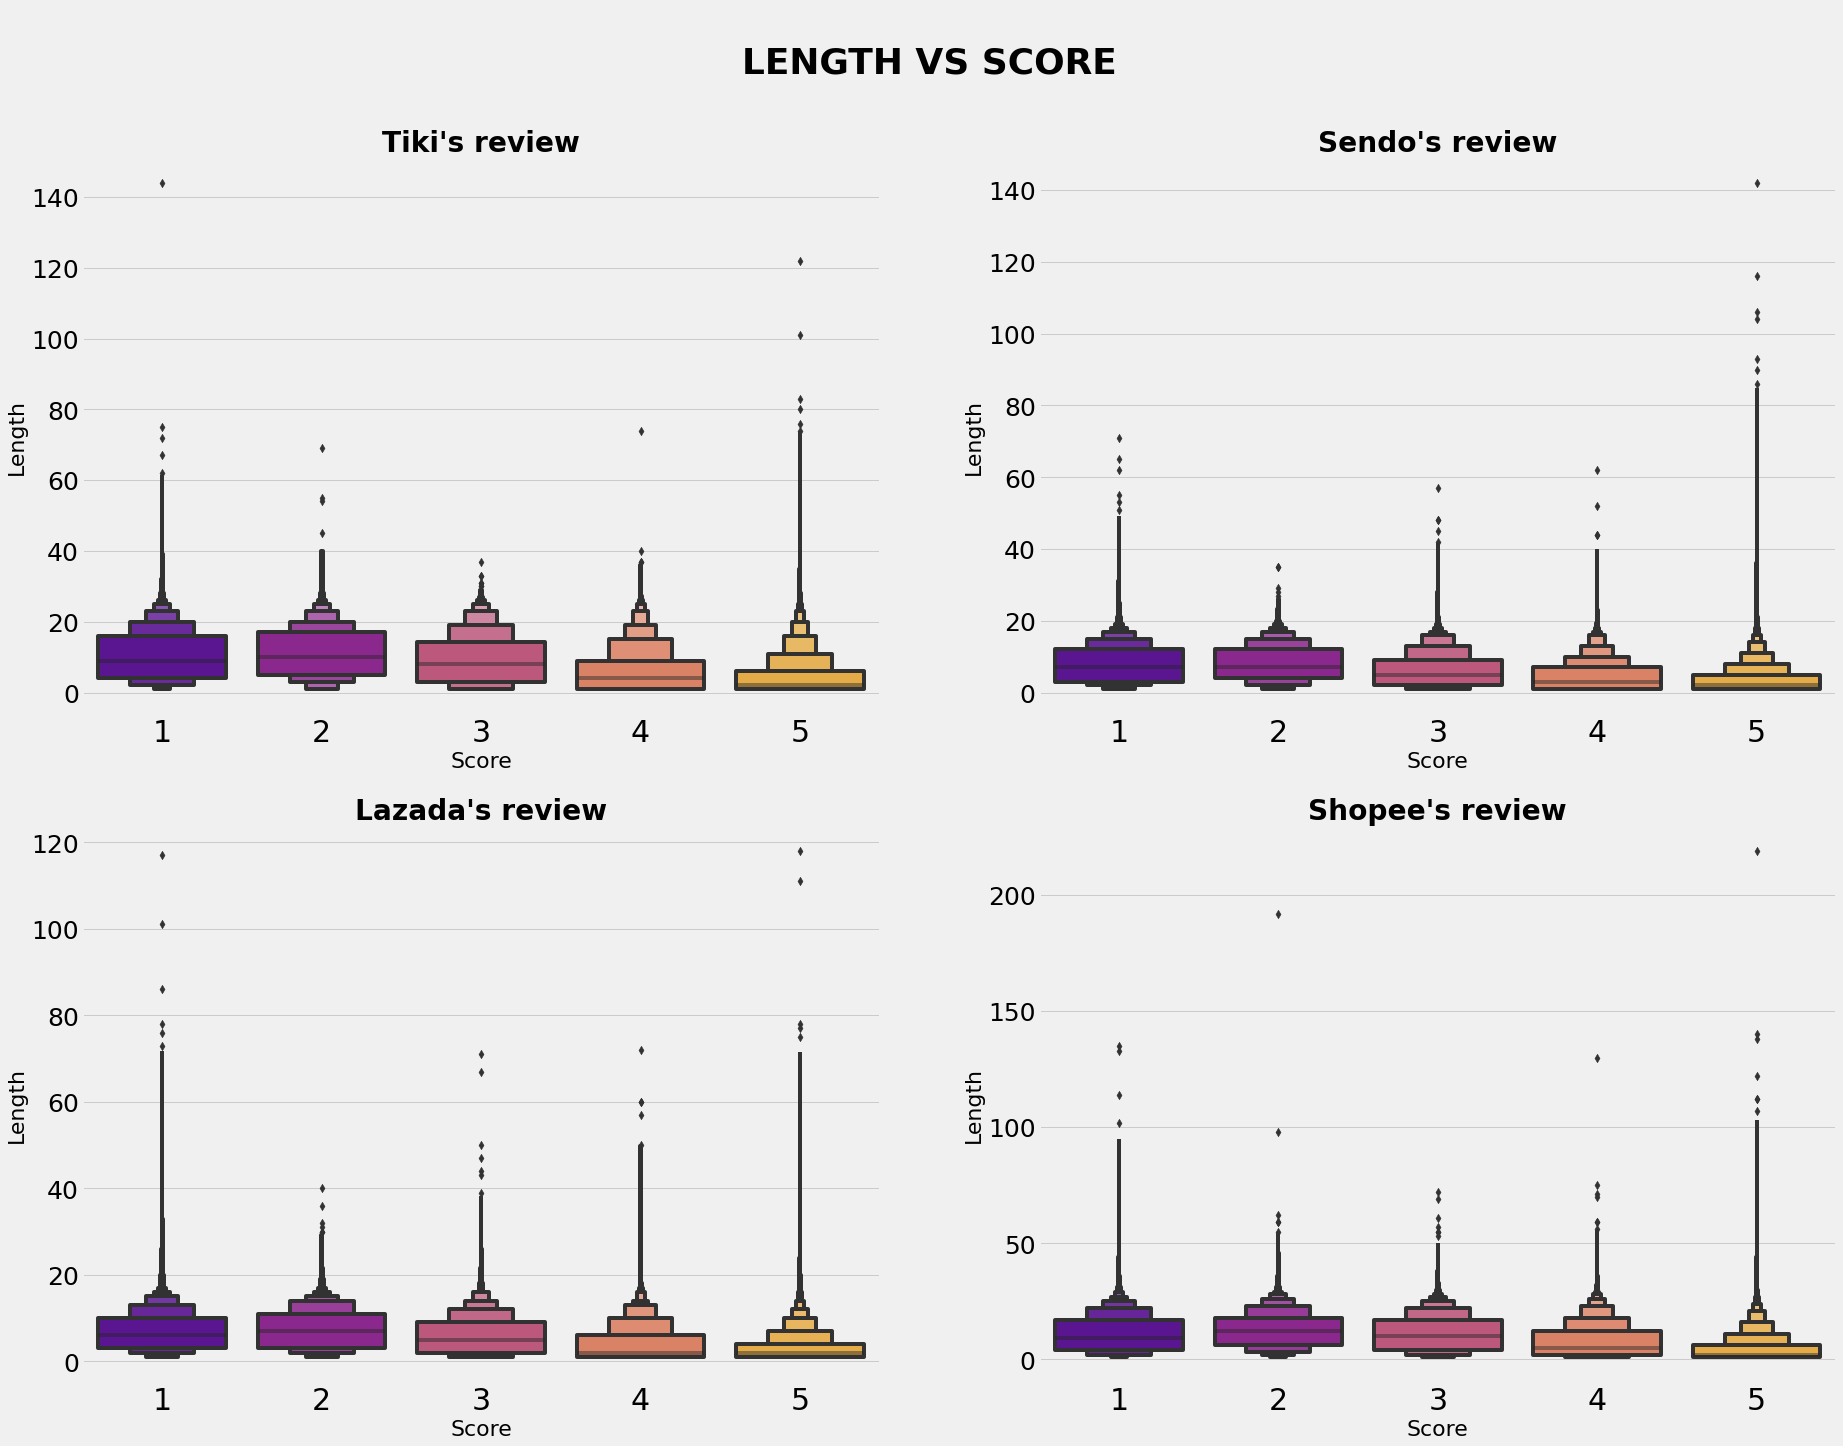

In [19]:
#Length and score
fig, axes = plt.subplots(nrows=2,ncols=2, figsize= (28,21))
color = plt.cm.plasma(np.linspace(0, 1, 10))

sns.boxenplot(data_tiki['score'], data_tiki['content_length'], palette='plasma', ax=axes[0,0])
sns.boxenplot(data_sendo['score'], data_sendo['content_length'], palette='plasma', ax=axes[0,1])
sns.boxenplot(data_lazada['score'], data_lazada['content_length'], palette='plasma', ax=axes[1,0])
sns.boxenplot(data_shopee['score'], data_shopee['content_length'], palette='plasma', ax=axes[1,1])

axes[0,0].set_title("Tiki's review", fontweight = 600, fontsize = 28)
axes[0,1].set_title("Sendo's review", fontweight = 600, fontsize = 28)
axes[1,0].set_title("Lazada's review", fontweight = 600, fontsize = 28)
axes[1,1].set_title("Shopee's review", fontweight = 600, fontsize = 28)

axes[0,0].set_xlabel('Score', fontsize = 22)
axes[0,1].set_xlabel('Score', fontsize = 22)
axes[1,0].set_xlabel('Score', fontsize = 22)
axes[1,1].set_xlabel('Score', fontsize = 22)

axes[0,0].set_ylabel('Length', fontsize = 22)
axes[0,1].set_ylabel('Length', fontsize = 22)
axes[1,0].set_ylabel('Length', fontsize = 22)
axes[1,1].set_ylabel('Length', fontsize = 22)

axes[0,0].set_xticklabels(axes[0,0].get_xticklabels(), rotation= 0, fontsize= 30)
axes[0,1].set_xticklabels(axes[0,1].get_xticklabels(), rotation= 0, fontsize= 30)
axes[1,0].set_xticklabels(axes[1,0].get_xticklabels(), rotation= 0, fontsize= 30)
axes[1,1].set_xticklabels(axes[1,1].get_xticklabels(), rotation= 0, fontsize= 30)
axes[0,0].set_yticklabels(("0","0","20","40","60","80","100","120","140"), fontsize= 25)
axes[0,1].set_yticklabels(("0","0","20","40","60","80","100","120","140"), fontsize= 25)
axes[1,0].set_yticklabels(("0","0","20","40","60","80","100","120"), fontsize= 25)
axes[1,1].set_yticklabels(("0","0","50","100","150","200"), fontsize= 25)

plt.suptitle("\nLENGTH VS SCORE", fontweight = "bold", fontsize = 36)

plt.savefig('Length_vs_Score.png', bbox_inches= "tight")
plt.show()